# 03. 베타-이항분포 모델
- 당신은 선거철 내내 30개의 다른 여론조사를 실시했습니다. 미셸의 지지는 45% 정도였지만, 그녀는 가장 낮을 때는 25%, 높을 때는 55% 정도의 지지율을 얻었다.
- **당선확률 $\pi$는 0과 1사이의 값을 가지며, 연속형 사전 분포를 가짐**

In [2]:
library(bayesrules)
library(tidyverse)

<br>

## 03.01. 베타분포

<br>

### 연속형 확률모델
> $\pi$가 확률밀도함수 $f(\pi)$를 가지는 연속형 확률변수일 때, 아래의 속성을 가짐
>
>1. $f(\pi) \ge 0$
> 2. $\int_\pi f(\pi)d\pi = 1$ 
> 3. $P(a < \pi < b) = \int_a^b f(\pi) d\pi$ ($a \leq b$)


<br>

### 베타분포
> $\pi$가 0과 1사이의 값을 가지는 확률변수일 때 ($\pi \in [0,1]$),
> 
> $\pi$의 변동은 $\alpha>0,\;\beta>0$인 베타분포로 모델링 될 수 있다 ($\alpha$, $\beta$는 초매개변수)
>
> $$\pi \sim \text{Beta}(\alpha, \beta).$$

> 베타분포는 연속형 확률밀도함수
> 
> $$\begin{equation}
f(\pi) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)} \pi^{\alpha-1} (1-\pi)^{\beta-1} \;\; \text{ for } \pi \in [0,1]
\end{equation}$$를 가짐
>
> $$\Gamma(z) = \int_0^\infty x^{z-1}e^{-y}dx\;\;\; (z는\;양의\;정수)$$
>
> $$\Gamma(z) = (z-1)!$$

> **$\pi$가 매개변수 $\alpha=1, \beta=1$를 가지는 베타분포를 따를 때, 확률분포함수 $f(\pi)$는 0과 1사이에서 균등한 값을 가지며, 이는 표준화 균등분포**
> 
> $$\pi \sim \text{Unif}(0,1)$$
>
> 표준화 균등분포는 $f(\pi) = 1$ for $\pi \in [0,1]$이며, 베타분포의 형태 중 하나


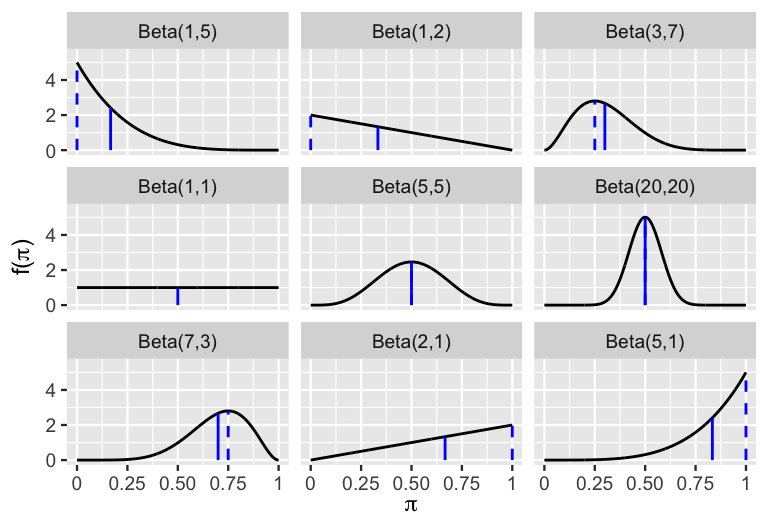

<br>

> 베타분포의 평균
> 
> $$\begin{equation}
\begin{split}
E(\pi) & = \int \pi \cdot f(\pi)d\pi \;= \frac{\alpha}{\alpha + \beta} \\
\end{split}
\end{equation}$$
>
> 베타분포의 최빈값
>
> $$Mode(\pi) = \text{argmax}_\pi f(\pi). = \frac{\alpha - 1}{\alpha + \beta - 2}$$
>
> 베타분포의 분산
>
> $$\text{Var}(\pi) = E((\pi - E(\pi))^2) = \int (\pi - E(\pi))^2 \cdot f(\pi) d\pi.=  \frac{\alpha \beta}{(\alpha + \beta)^2(\alpha + \beta + 1)} $$

>
> 표준편차
> $$\text{SD}(\pi) := \sqrt{\text{Var}(\pi)}  .$$

<br>

### 베타사전분포 튜닝
- 여론조사에서 미셸의 평균 지지율은 약 45%, 대략적으로 최저 25%포인트, 최고 65%포인트를 가짐
- 따라서 
    $$E(\pi) = \alpha/(\alpha + \beta) \approx 0.45$$ 

    $$\alpha \approx \frac{9}{11} \beta  .$$를 만족하는 $\alpha$와 $\beta$값을 탐색

<br>

#### `bayesrules::plot_beta(alpha, beta, ...)` : `alpha`, `beta`를 매개변수로 가지는 베타분포 시각화

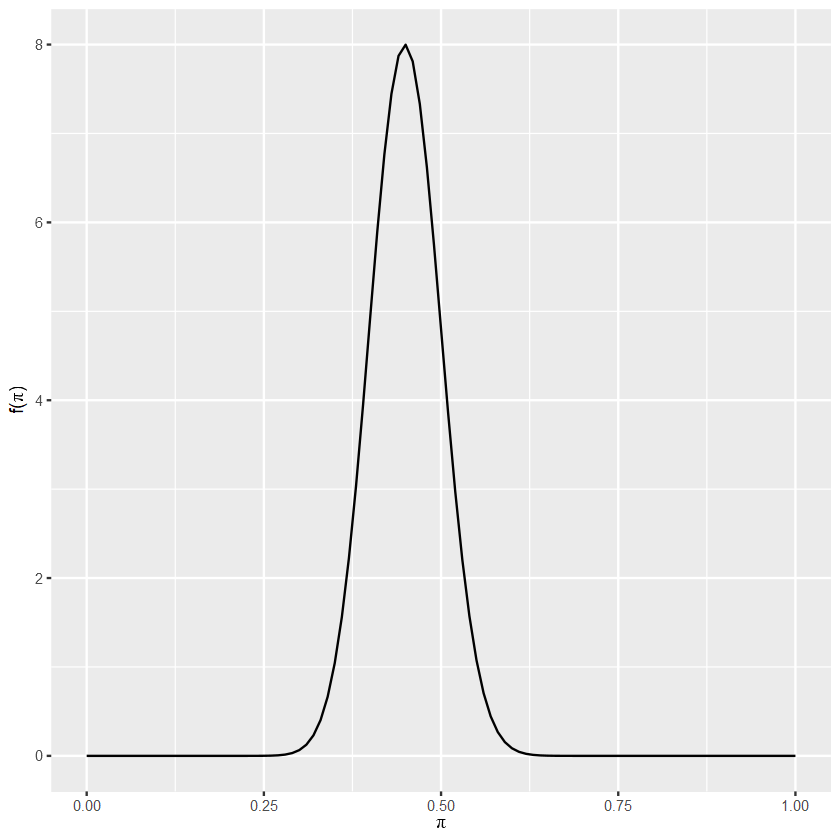

In [8]:
bayesrules::plot_beta(45, 55, 0.45)

<br>

#### $\pi$에 대한 베타사전분포의 매개변수를 각각 $\alpha=45$, $\beta=55$로 설정

$$\pi \sim \text{Beta}(45,55)$$

$$\begin{equation}
f(\pi) = \frac{\Gamma(100)}{\Gamma(45)\Gamma(55)}\pi^{44}(1-\pi)^{54} \;\; \text{ for } \pi \in [0,1]  .
\end{equation}$$

$$\begin{equation}
E(\pi) = \frac{45}{45 + 55} = 0.4500 \;\; \text{ and } \;\; \text{Mode}(\pi) = \frac{45 - 1}{45 + 55 - 2} = 0.4490  .
\end{equation}$$

$$\begin{equation}
\begin{split}
\text{Var}(\pi) & = \frac{45 \cdot 55}{(45 + 55)^2(45 + 55 + 1)} = 0.0025 \\
\text{SD}(\pi)  & = \sqrt{0.0025} = 0.05.\\
\end{split}
\end{equation}$$

<br>

## 03.02. 이항분포 & 가능도
- $n=50$명의 설문 응답자로부터, 설문 응답을 받았을 때,

    지지자의 수 $Y$는 이항분포를 따른다고 가정
    
    $$Y | \pi \sim \text{Bin}(50, \pi)$$
    
    $$\begin{equation}
f(y|\pi) = P(Y=y | \pi) = \left(\!\!\begin{array}{c} 50 \\ y \end{array}\!\!\right) \pi^y (1-\pi)^{50-y}  .
\end{equation}$$

<br>

- 각 $\pi$ 값이 주어졌을 때, $Y=30$의 조건부 확률질량함수

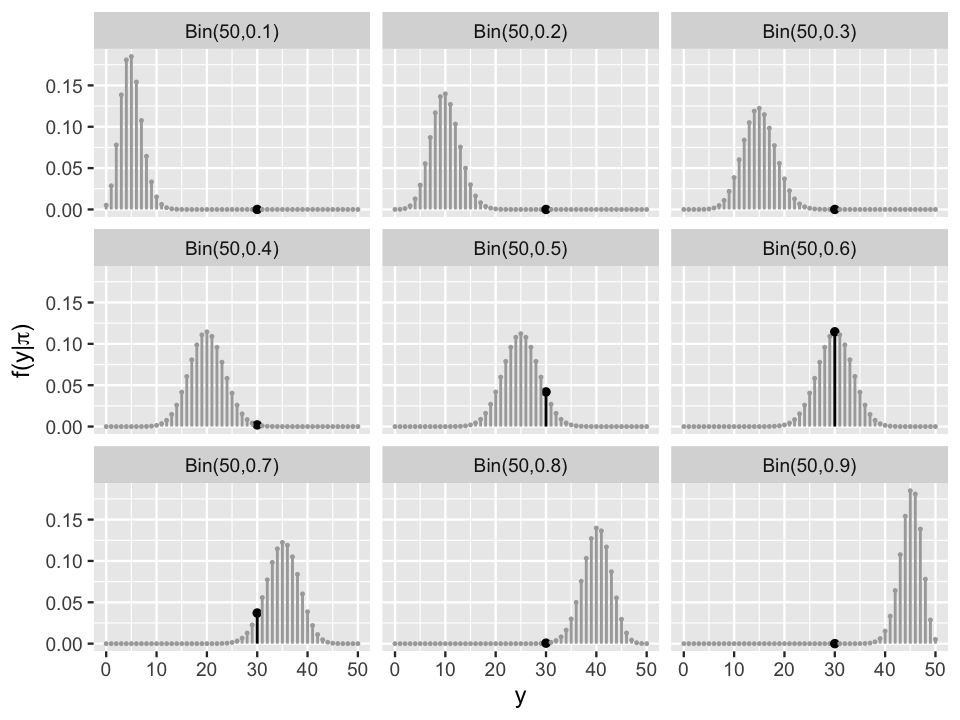

<br>

* $Y=30$으로 주어졌을 때, $\pi$값에 대한 가능도

    $$\begin{equation}
    L(\pi | y=30) = \left(\!\!\begin{array}{c} 50 \\ 30 \end{array}\!\!\right) \pi^{30} (1-\pi)^{20} \; \; \text{ for } \pi \in [0,1]  .
    \end{equation}$$
    
    - $\pi=0.6$의 가능도
    $$L(\pi = 0.6 | y = 30) = \left(\!\!\begin{array}{c} 50 \\ 30 \end{array}\!\!\right) 0.6^{30} 0.4^{20} \approx 0.115$$

<br>

## 03.03. 베타-이항분포
- $Y$가 $\pi$, $n$을 매개변수로 가지는 이항분포를 따르고, 

    $\pi$가 $\alpha,\;\beta$를 매개변수로 가지는 베타사전분포를 따를 때,

    $$\begin{split}
    Y | \pi & \sim \text{Bin}(n, \pi)  \\
        \pi & \sim \text{Beta}(\alpha, \beta). \\
    \end{split}$$
    
    **사후분포는**
    
    $$\begin{equation}
\pi | (Y = y) \sim \text{Beta}(\alpha + y, \beta + n - y)  .
\end{equation}$$

    사후분포의 통계량은

    $$\begin{equation}
\begin{split}
E(\pi | Y=y)           & = \frac{\alpha + y}{\alpha + \beta + n} \\
\text{Mode}(\pi | Y=y) & = \frac{\alpha + y - 1}{\alpha + \beta + n - 2} \\
\text{Var}(\pi | Y=y)  & = \frac{(\alpha + y)(\beta + n - y)}{(\alpha + \beta + n)^2(\alpha + \beta + n + 1)}.\\
\end{split}
\end{equation}$$

<br>

#### 켤레사전분포
> **사후분포 $f(\pi|y) \propto f(\pi)L(\pi|y)$가 사전분포 $f(\pi)$와 같은 분포군에 속한다면,**
>
> **사전분포 $f(\pi)$는 $L(\pi|y)$와 켤레사전분포관계**

<br>

### 증명
- 사전분포와 가능도가 각각 

    $$\begin{equation}
    f(\pi) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}\pi^{\alpha - 1}(1-\pi)^{\beta - 1} 
    \;\; \text{ and } \;\; 
    L(\pi|y) = \left(\!\!\begin{array}{c} n \\ y \end{array}\!\!\right) \pi^{y} (1-\pi)^{n-y}  .
    \end{equation}$$
    
    <br>

    **이라면, 비례법칙에 따라 정규화 상수를 생략하여**
    
    $$\begin{split}
f(\pi | y)
& \propto f(\pi)L(\pi|y) \\
& = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}\pi^{\alpha - 1}(1-\pi)^{\beta - 1}  \cdot \left(\!\begin{array}{c} n \\ y \end{array}\!\right) \pi^{y} (1-\pi)^{n-y} \\
& \propto \pi^{(\alpha + y) - 1} (1-\pi)^{(\beta + n - y) - 1}  .\\
\end{split}$$

    **정규화 상수에 대한 계산을 더하면, 사후분포는**
    
    $$f(\pi|y) = \frac{\Gamma(\alpha+\beta+n)}{\Gamma(\alpha+y)\Gamma(\beta+n-y)}\pi^{(\alpha + y) - 1} (1-\pi)^{(\beta + n - y) - 1}.$$**이 된다**
    
    **이는 $Beta(\alpha+y, \beta+n-y)$의 확률밀도함수**
    
<br>

#### 따라서  $n$번의 시도에서 $Y=y$번의 성공 관측이후의, $\pi$의 분포는 $\text{Beta}(\alpha + y, \beta + n - y)$

<br>

## 03.04. 베타사후분포
- $Y$가 $\pi$, $n=50$을 매개변수로 가지는 이항분포를 따르고, 

    $\pi$가 $\alpha=45,\;\beta=55$를 매개변수로 가지는 베타사전분포를 따를 때,

    $$\begin{split}
    Y | \pi & \sim \text{Bin}(50, \pi)  \\
        \pi & \sim \text{Beta}(45, 55). \\
    \end{split}$$
    
    <br>
    
    $$\begin{split}
f(\pi | y = 30)
& \propto f(\pi) L(\pi | y=30)  \\
& = \frac{\Gamma(100)}{\Gamma(45)\Gamma(55)}\pi^{44}(1-\pi)^{54} \cdot \left(\!\!\begin{array}{c} 50 \\ 30 \end{array}\!\!\right) \pi^{30} (1-\pi)^{20}  \\
& = \left[\frac{\Gamma(100)}{\Gamma(45)\Gamma(55)}\left(\!\!\begin{array}{c} 50 \\ 30 \end{array}\!\!\right) \right] \cdot \pi^{74} (1-\pi)^{74}  \\
& \propto \pi^{74} (1-\pi)^{74}  . \\
\end{split}$$

    <br>

    **사후분포는 $\alpha=75$, $\beta=75$를 매개변수로 가지는 베타분포**

<br>

#### `bayesrules::plot_beta_binomial(alpha, beta, y, n)` : 베타-이항분포의 사전/사후분포 시각화

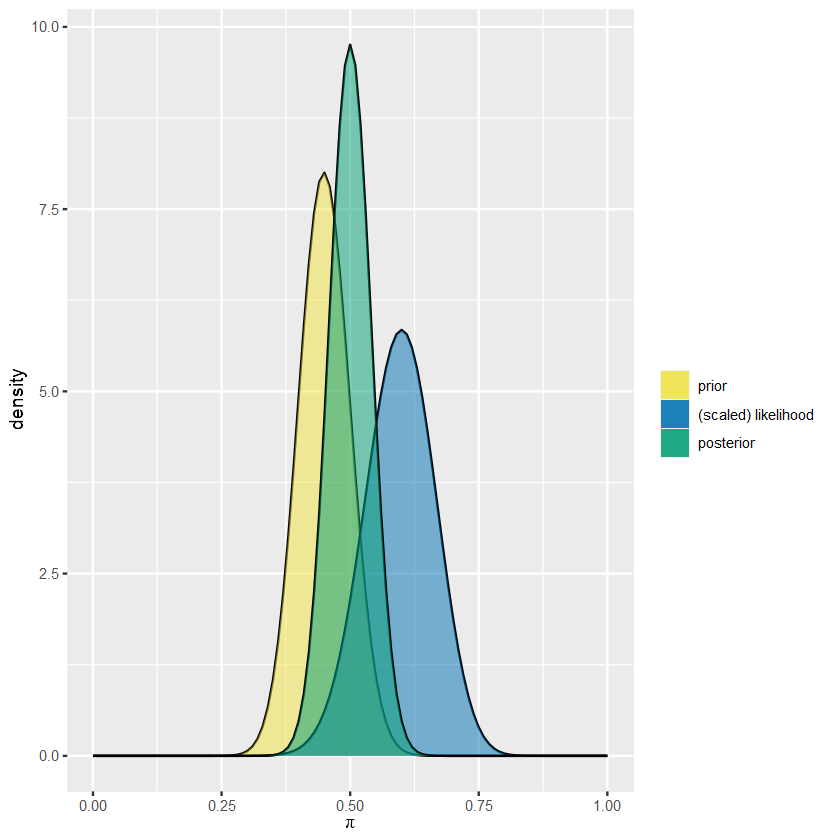

In [9]:
plot_beta_binomial(alpha = 45, beta = 55, y = 30, n = 50)

<br>

#### `bayesrules::summarize_beta_binomial(alpha, beta, y, n)` : 베타-이항분포의 통계량 요약

In [10]:
summarize_beta_binomial(alpha = 45, beta = 55, y = 30, n = 50)

model,alpha,beta,mean,mode,var,sd
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
prior,45,55,0.45,0.4489796,0.002450495,0.04950248
posterior,75,75,0.50,0.5000000,0.001655629,0.04068942


<br>

## 03.05. 시뮬레이션

* 베타사전분포의 각 추출값 $\pi$를 매개변수로 가지는 이항분포에서의 50회 시행에 따른 각 성공횟수

In [12]:
set.seed(84735)
michelle_sim <- data.frame(pi = rbeta(10000, 45, 55)) %>% 
  mutate(y = rbinom(10000, size = 50, prob = pi))

michelle_sim %>% head

,pi,y
,<dbl>,<int>
1,0.4884391,23
2,0.4430527,14
3,0.4953429,35
4,0.4633678,29
5,0.4963052,36
6,0.5495968,26


- $Y=30$인 행을 추출 ($Y=30$을 관측)

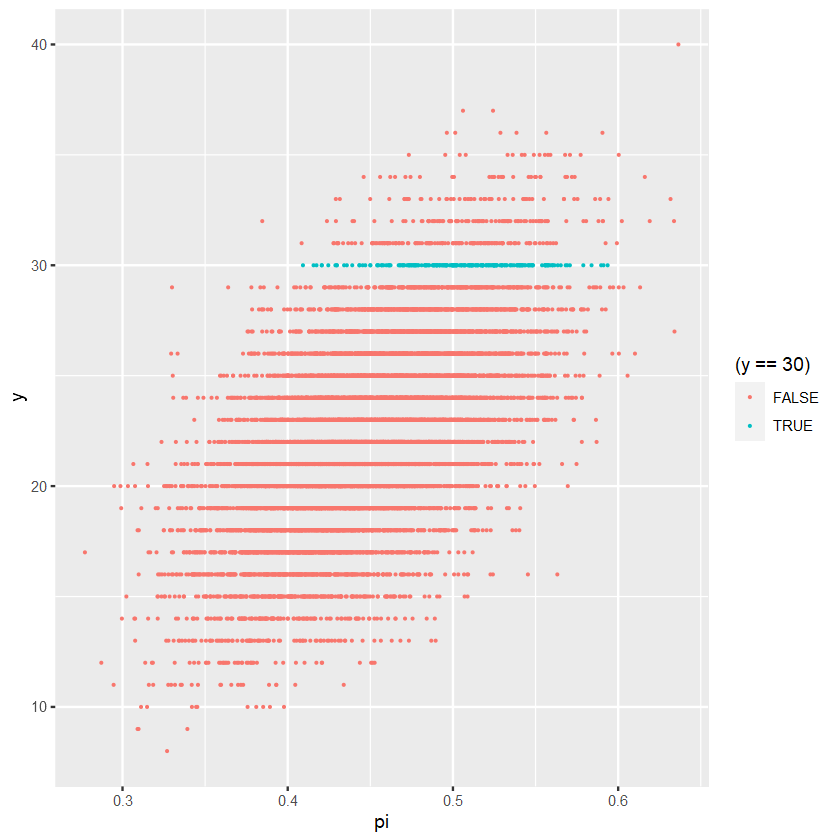

In [13]:
ggplot(michelle_sim, aes(x = pi, y = y)) + 
  geom_point(aes(color = (y == 30)), size = 0.1)

In [14]:
michelle_posterior <- michelle_sim %>% 
  filter(y == 30)

<br>

- $Y=30$인 결과들에 대한 분포 (=사후분포)

In [18]:
nrow(michelle_posterior)

[1] 211

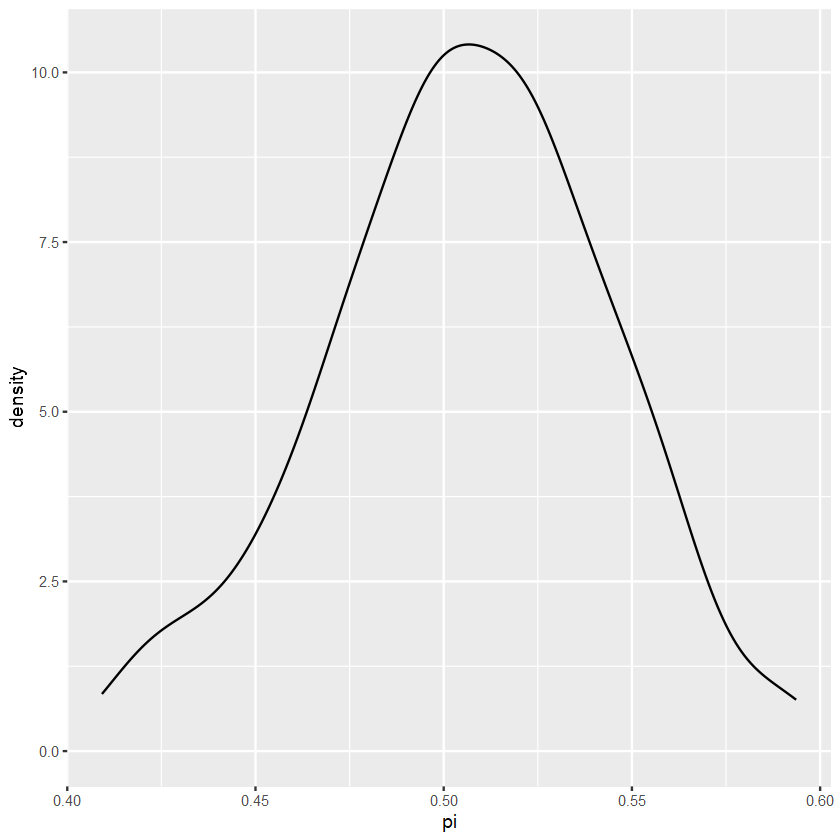

In [15]:
ggplot(michelle_posterior, aes(x = pi)) + 
  geom_density()

In [16]:
michelle_posterior %>% 
  summarize(mean(pi), sd(pi))

mean(pi),sd(pi)
<dbl>,<dbl>
0.5054909,0.03732097
